In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [22]:
# Cargar el dataset
url_2 = "https://d37ci6vzurychx.cloudfront.net/trip-data/green_tripdata_2025-06.parquet"
data = pd.read_parquet(url_2, engine="pyarrow")

In [23]:
# Convertir columnas de fecha y hora a formato datetime
data['lpep_pickup_datetime'] = pd.to_datetime(data['lpep_pickup_datetime'])
data['lpep_dropoff_datetime'] = pd.to_datetime(data['lpep_dropoff_datetime'])

## Justificación:

-Convertir las columnas de fecha y hora al formato datetime permite realizar operaciones temporales como calcular la duración del viaje, extraer características como la hora o el día, y analizar patrones temporales.

-Esto es esencial para tareas como la identificación de horas pico, estacionalidad, y análisis de demanda.

In [24]:
# Crear nuevas características temporales
data['pickup_hour'] = data['lpep_pickup_datetime'].dt.hour
data['pickup_day'] = data['lpep_pickup_datetime'].dt.day_name()
data['pickup_month'] = data['lpep_pickup_datetime'].dt.month

## Justificación:

-pickup_hour: Permite analizar cómo varían las tarifas y la demanda a lo largo del día. Esto es útil para identificar horas pico y optimizar la asignación de vehículos.

-pickup_day: Ayuda a distinguir patrones entre días de la semana, como diferencias entre días laborales y fines de semana.

-pickup_month: Aunque en este caso el dataset es de un solo mes, esta característica sería útil para analizar tendencias a largo plazo si se tienen datos de varios meses.

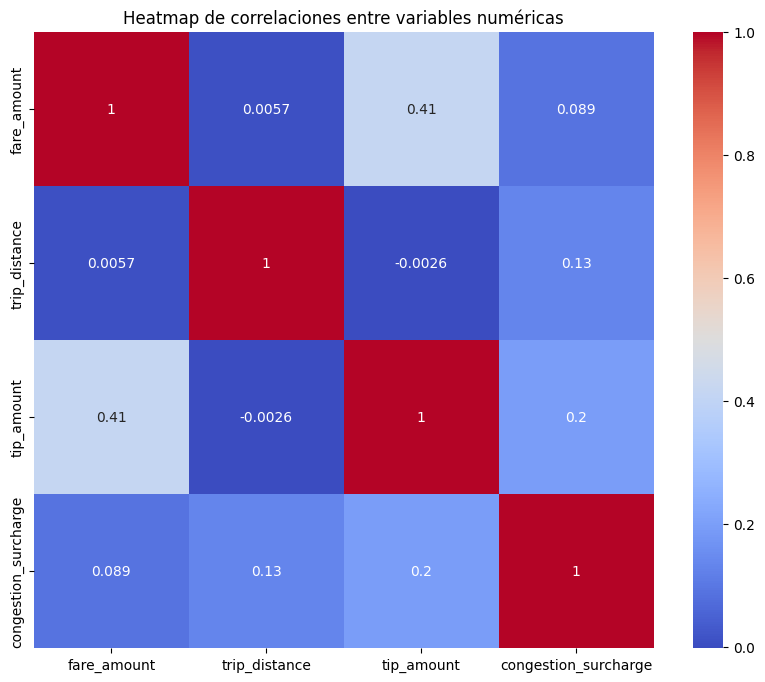

In [25]:
# 1. Heatmap de correlaciones de variables numéricas
plt.figure(figsize=(10, 8))
sns.heatmap(data[['fare_amount', 'trip_distance', 'tip_amount', 'congestion_surcharge']].corr(), annot=True, cmap='coolwarm')
plt.title("Heatmap de correlaciones entre variables numéricas")
plt.show()

## Justificación:
-El heatmap muestra las correlaciones entre variables numéricas clave, como fare_amount (tarifa), trip_distance (distancia del viaje), tip_amount (propinas) y congestion_surcharge (recargo por congestión).

-Esto ayuda a identificar relaciones importantes, como si la tarifa está fuertemente correlacionada con la distancia o si los recargos afectan significativamente el costo total.

-Las correlaciones pueden guiar la selección de variables para el modelado.

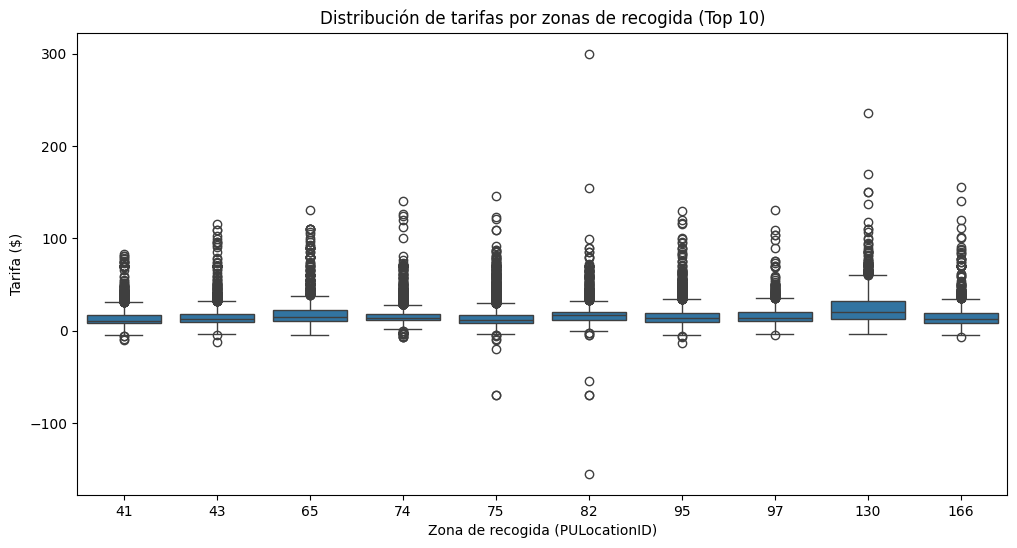

In [26]:
# 2. Comparar tarifas y duraciones por zonas geográficas (si están disponibles)
if 'PULocationID' in data.columns and 'DOLocationID' in data.columns:
    top_pickup_zones = data['PULocationID'].value_counts().head(10).index
    filtered_data = data[data['PULocationID'].isin(top_pickup_zones)]
    
    plt.figure(figsize=(12, 6))
    sns.boxplot(x='PULocationID', y='fare_amount', data=filtered_data)
    plt.title("Distribución de tarifas por zonas de recogida (Top 10)")
    plt.xlabel("Zona de recogida (PULocationID)")
    plt.ylabel("Tarifa ($)")
    plt.show()

## Justificación:
-Este análisis compara las tarifas en las 10 zonas de recogida más frecuentes (PULocationID).

-Ayuda a identificar zonas con tarifas más altas o más bajas, lo que puede ser útil para la planificación de precios y la asignación de vehículos.

-Los boxplots muestran la variabilidad de las tarifas dentro de cada zona, lo que puede revelar patrones o anomalías.

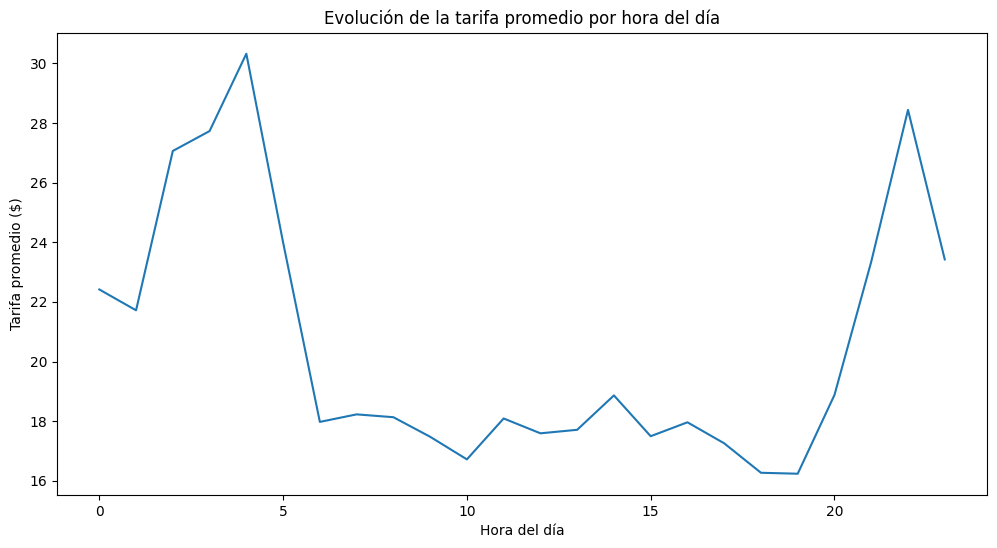

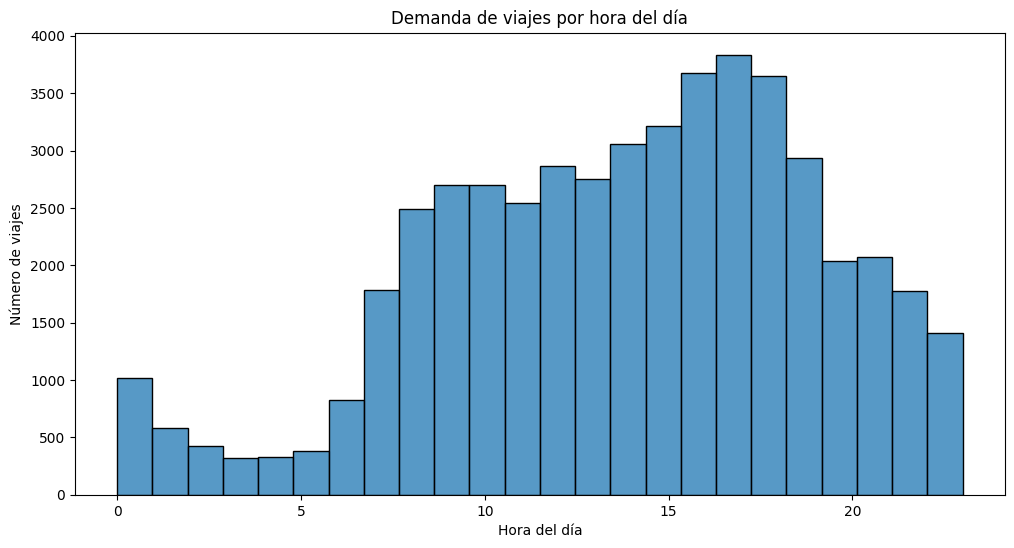

In [27]:
# 3. Series temporales: evolución de tarifas y demanda por horas del día
plt.figure(figsize=(12, 6))
sns.lineplot(x='pickup_hour', y='fare_amount', data=data, errorbar=None)
plt.title("Evolución de la tarifa promedio por hora del día")
plt.xlabel("Hora del día")
plt.ylabel("Tarifa promedio ($)")
plt.show()

plt.figure(figsize=(12, 6))
sns.histplot(data['pickup_hour'], bins=24, kde=False)
plt.title("Demanda de viajes por hora del día")
plt.xlabel("Hora del día")
plt.ylabel("Número de viajes")
plt.show()

## Justificación:
-Evolución de tarifas promedio por hora del día:
Este análisis utiliza un gráfico de líneas para mostrar cómo varía la tarifa promedio a lo largo del día.
Permite identificar patrones horarios, como tarifas más altas durante las horas pico (por ejemplo, temprano en la mañana o al final de la tarde).
Es útil para entender cómo los factores temporales (como la congestión o la demanda) afectan las tarifas.

-Demanda de viajes por hora del día:
El histograma muestra la cantidad de viajes realizados en cada hora del día.
Ayuda a identificar las horas de mayor actividad (horas pico) y las horas de menor demanda.
Este análisis es clave para la planificación operativa, como la asignación de vehículos y conductores.

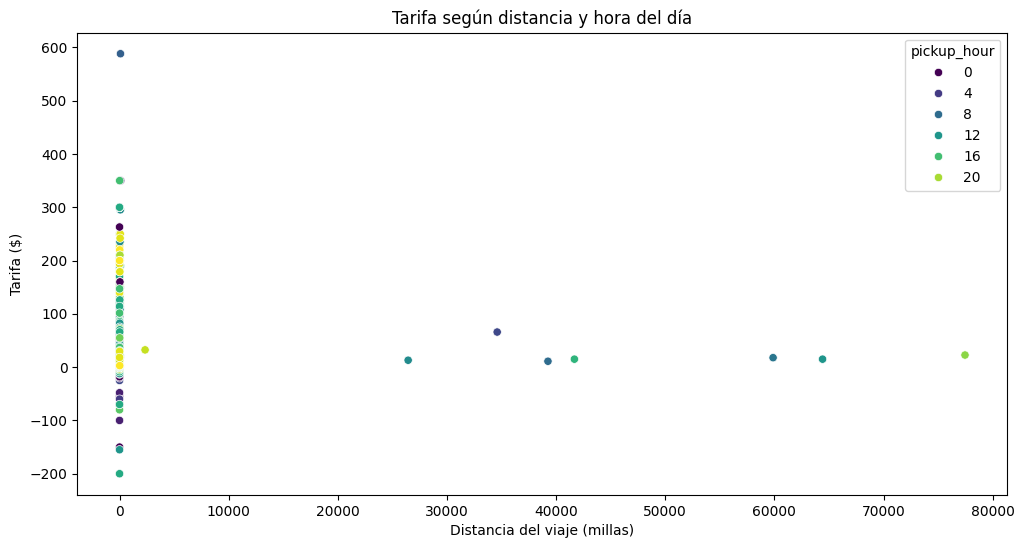

In [28]:
# 4. Cruces de múltiples variables: tarifa según distancia y hora del día
plt.figure(figsize=(12, 6))
sns.scatterplot(x='trip_distance', y='fare_amount', hue='pickup_hour', palette='viridis', data=data)
plt.title("Tarifa según distancia y hora del día")
plt.xlabel("Distancia del viaje (millas)")
plt.ylabel("Tarifa ($)")
plt.show()

## Justificación:
-Este análisis utiliza un gráfico de dispersión para explorar la relación entre la distancia del viaje y la tarifa, con la hora del día como una tercera dimensión (hue).

-Permite identificar:
    -Si las tarifas son proporcionales a la distancia.
    -Si hay variaciones significativas en las tarifas según la hora del día.
    -Anomalías, como tarifas inusualmente altas para distancias cortas o tarifas bajas para distancias largas.

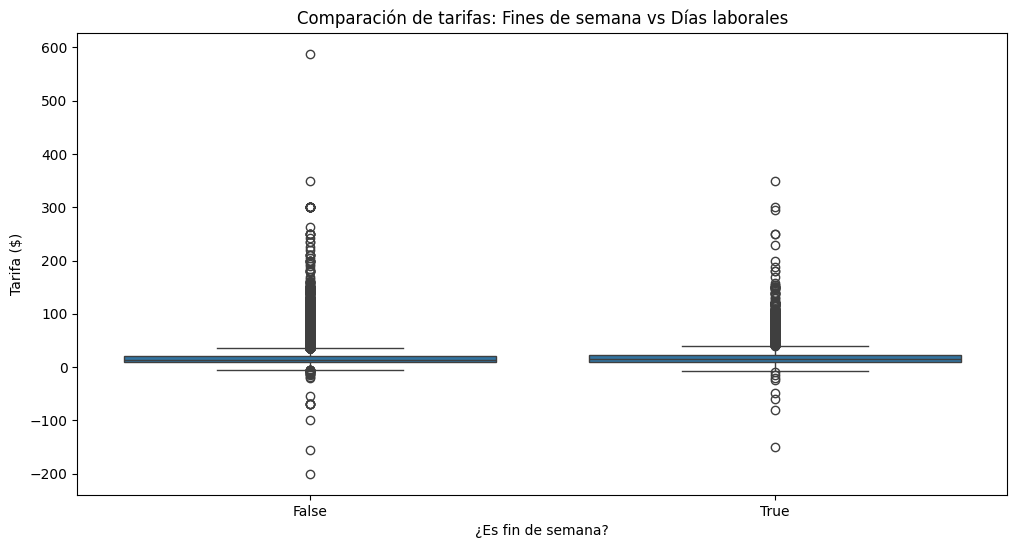

In [29]:
# 5. Identificar estacionalidad: fines de semana vs días laborales
data['is_weekend'] = data['pickup_day'].isin(['Saturday', 'Sunday'])

plt.figure(figsize=(12, 6))
sns.boxplot(x='is_weekend', y='fare_amount', data=data)
plt.title("Comparación de tarifas: Fines de semana vs Días laborales")
plt.xlabel("¿Es fin de semana?")
plt.ylabel("Tarifa ($)")
plt.show()

## Justificación:
-Este análisis compara las tarifas entre fines de semana y días laborales utilizando un boxplot.

-Permite identificar si las tarifas son consistentemente más altas o más bajas durante los fines de semana.

-Los fines de semana suelen tener patrones de demanda diferentes (por ejemplo, más viajes recreativos), lo que puede afectar las tarifas.